### Importing basic libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as ms

### Importing the dataset 

In [34]:
data = pd.read_csv('Data.csv')

### Analyze data

In [35]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [36]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [38]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [39]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [40]:
data.shape

(9568, 5)

### Visualize the data

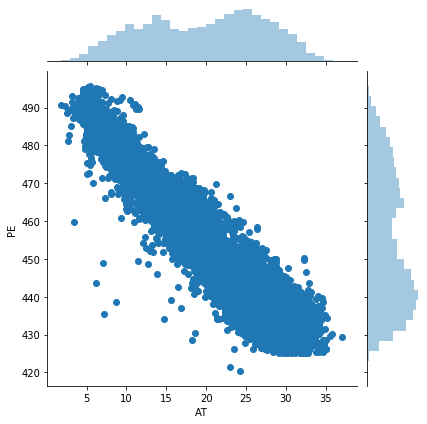

In [41]:
sns.jointplot(x='AT',y='PE',data=data)

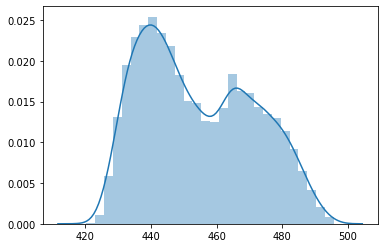

In [42]:
sns.distplot([data['PE']])

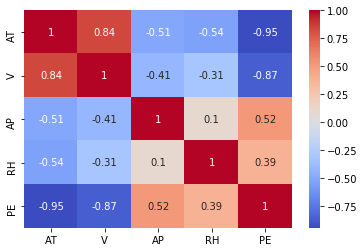

In [43]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

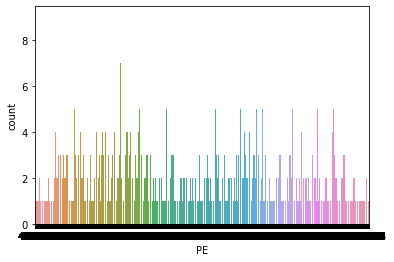

In [44]:
sns.countplot(data['PE'])

### Cleaning data

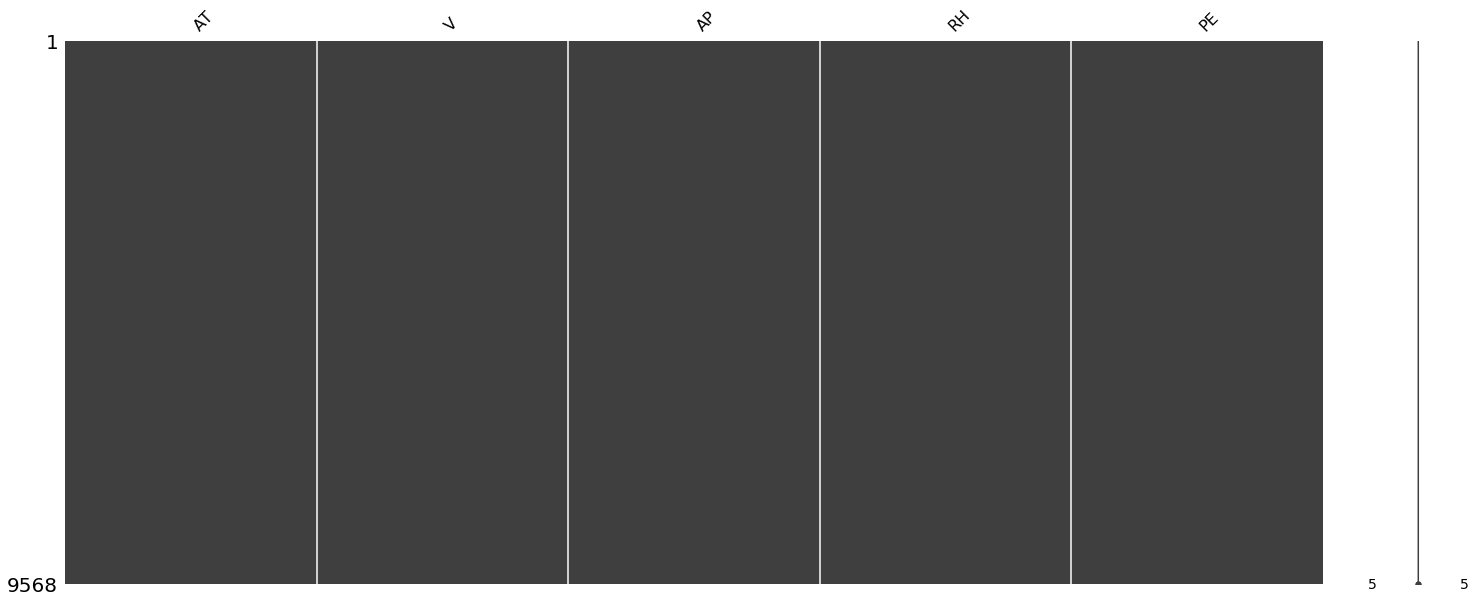

In [45]:
ms.matrix(data)

### Categorical Conversion

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### train_test_split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('PE',axis=1),data['PE'],test_size=0.3,random_state=1)

### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [51]:
X_train = sc_x.fit_transform(X_train)

In [52]:
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train = sc_y.fit_transform(Y_train)

### Training the data

In [53]:
from sklearn.svm import SVR

In [54]:
regressor = SVR(kernel='rbf')

In [55]:
regressor.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the test dataset

In [56]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(X_test)))

### Results

In [60]:
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(len(y_pred),1)

In [61]:
np.set_printoptions(precision=2)

In [62]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[457.03 458.96]
 [463.72 463.29]
 [437.21 435.27]
 ...
 [433.52 435.51]
 [455.21 458.64]
 [444.04 442.62]]


### R-squared score

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(Y_test,y_pred)

0.9454409086637298